In [58]:
import cv2
import imutils as imu
import matplotlib.pyplot as plt
%matplotlib inline
def show(im, cmap='gray'):
    plt.imshow(im, cmap=cmap)

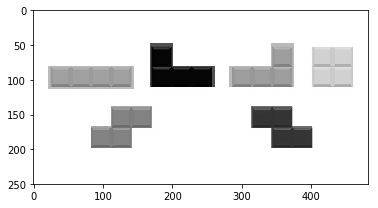

In [43]:
im = cv2.imread('utils/tetris.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
show(im)

Image thresholding is an important intermediary step for image processing pipelines.  
Thresholding can help us to remove lighter or darker regions and contours of images.  

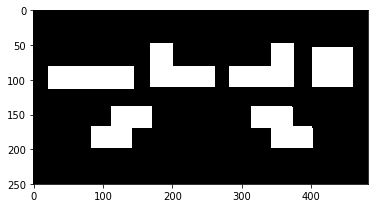

In [49]:
r = cv2.threshold(im, 225, 255, cv2.THRESH_BINARY_INV)[1]
show(r)

finding contours

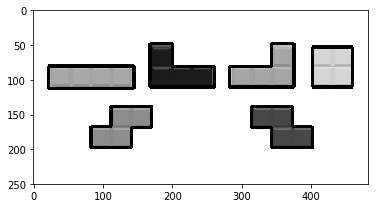

In [64]:
t = cv2.threshold(im, 225, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(t.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imu.grab_contours(contours)
r = im.copy()
for c in contours:
    cv2.drawContours(r, [c], -1, (0,0,0), 3)
show(r)

Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding).  
To reduce the size of foreground objects we can erode away pixels given a number of iterations.  
Similarly, we can foreground regions in the mask. To enlarge the regions, simply use dilate.

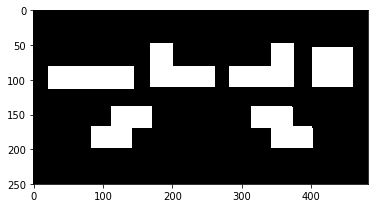

In [65]:
show(t)

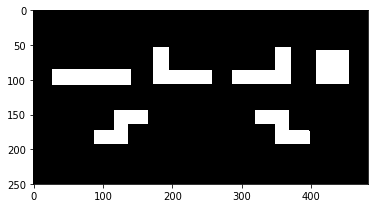

In [67]:
r = t.copy()
r = cv2.erode(r, None, iterations=5)
show(r)

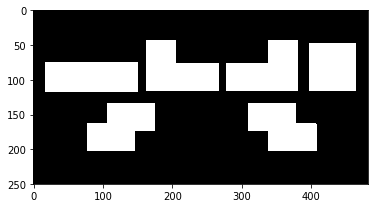

In [69]:
r = t.copy()
r = cv2.dilate(r, None, iterations=5)
show(r)

Use bitwise and to mask out image parts

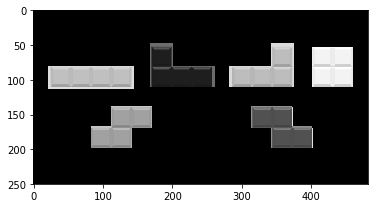

In [72]:
r = cv2.bitwise_and(im, im, mask=t.copy())
show(r)